In [1]:
%cd ../../../..

/Users/jbbutler129/Google Drive (butlerj@berkeley.edu)/Classes/215A/final_project/rule-vetting


In [13]:
import rulevetting.projects.tbi_pecarn.model_best as mb
from rulevetting.projects.tbi_pecarn.dataset import Dataset
from rulevetting.projects.tbi_pecarn.dataset import AgeSplit
from sklearn.metrics import confusion_matrix
import itertools as it
import numpy as np

## Giving an Example to Recreate Results from Paper

In [3]:
df_train, df_tune, df_test = Dataset().get_data(split_age=AgeSplit.AGEINVARIANT,load_csvs=False)
true = df_test['outcome']
df_test.drop(['AgeinYears', 'Race', 'Gender', 'outcome'], axis = 1, inplace = True)

  0%|          | 0/1 [00:00<?, ?it/s]

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step9a_HEMA': True, 'step10_SFx': 2, 'step10a_SFx': True, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 1, 'step14a_Vomit': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 2, 'step16_SeizOccur': False, 'step17_LOC': 2, 'step17a_LOC': True, 'step19_Drugs': False, 'step20_ActNormal': True}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': 3, 'remove_constVal': True}}


100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


In [4]:
best_mod = mb.Model()
preds = best_mod.predict(df_test)

In [5]:
conf_mat = confusion_matrix(true, preds)

In [6]:
sensitivity = conf_mat[1,1]/(conf_mat[1,1] + conf_mat[1,0])
specificity = conf_mat[0,0]/(conf_mat[0,0] + conf_mat[0,1])

## Repeating the Above Process, with Perturbations

The perturbations we wish to employ are with respect to recoding and dealing with missing values:

1. step10_SFx: instead of recoding unclear as being true, leave unclear as it's own category and see if results change
2. step16_Seiz: instead of permitting missing SeizOccur, imputing from SeizLen, and dropping SeizOccur, drop missing observations from all variables and just keep SeizLen and Seiz
3. step17_LOC: instead of counting unclear LOC as present, just keep it as unclear
4. step20_ActNorma1: instead of counting missing observations as normal, count them as abnormal
5. step14_Vomit: instead of unioning the variables to impute missing values, we can just drop all the missing observations and then drop the rest of the columns

In [7]:
perturbations_dict = {'step10_SFx' : [2, 3], 
                      'step16_Seiz' : [2, 3],
                      'step17_LOC' : [2, 3],
                      'step20_ActNormal': [True, False],
                      'step14_Vomit': [2, 3]}


combos = list(it.product([1,0],[1,0], [1,0], [1,0], [1,0]))

dset = Dataset()
judg_calls = dset.get_judgement_calls_dictionary_default()

In [8]:
import pdb

results_dict = {}

for combo in combos:
    for i, key in enumerate(perturbations_dict.keys()):
        judg_calls['preprocess_data'][key] = perturbations_dict[key][combo[i]]
        
    df_train1, df_tune1, df_test1 = Dataset().get_data(split_age=AgeSplit.AGEINVARIANT,load_csvs=False, **judg_calls)
    true = df_test1['outcome']
    df_test1.drop(['AgeinYears', 'Race', 'Gender', 'outcome'], axis = 1, inplace = True)
        
    best_mod = mb.Model()
    preds = best_mod.predict(df_test1)
        
    conf_mat = confusion_matrix(true, preds)
    sensitivity = conf_mat[1,1]/(conf_mat[1,1] + conf_mat[1,0])
    specificity = conf_mat[0,0]/(conf_mat[0,0] + conf_mat[0,1])
        
    results_dict[str(combo)] = [sensitivity, specificity]
        
        
        

  0%|          | 0/1 [00:00<?, ?it/s]

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step9a_HEMA': True, 'step10_SFx': 3, 'step10a_SFx': True, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 3, 'step14a_Vomit': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 3, 'step16_SeizOccur': False, 'step17_LOC': 3, 'step17a_LOC': True, 'step19_Drugs': False, 'step20_ActNormal': False}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': 3, 'remove_constVal': True}}


100%|██████████| 1/1 [00:00<00:00,  5.14it/s]

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step9a_HEMA': True, 'step10_SFx': 3, 'step10a_SFx': True, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 2, 'step14a_Vomit': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 3, 'step16_SeizOccur': False, 'step17_LOC': 3, 'step17a_LOC': True, 'step19_Drugs': False, 'step20_ActNormal': False}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': 3, 'remove_constVal': True}}



100%|██████████| 1/1 [00:00<00:00,  5.39it/s]

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step9a_HEMA': True, 'step10_SFx': 3, 'step10a_SFx': True, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 3, 'step14a_Vomit': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 3, 'step16_SeizOccur': False, 'step17_LOC': 3, 'step17a_LOC': True, 'step19_Drugs': False, 'step20_ActNormal': True}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': 3, 'remove_constVal': True}}



100%|██████████| 1/1 [00:00<00:00,  5.16it/s]

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step9a_HEMA': True, 'step10_SFx': 3, 'step10a_SFx': True, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 2, 'step14a_Vomit': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 3, 'step16_SeizOccur': False, 'step17_LOC': 3, 'step17a_LOC': True, 'step19_Drugs': False, 'step20_ActNormal': True}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': 3, 'remove_constVal': True}}



100%|██████████| 1/1 [00:00<00:00,  5.23it/s]

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step9a_HEMA': True, 'step10_SFx': 3, 'step10a_SFx': True, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 3, 'step14a_Vomit': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 3, 'step16_SeizOccur': False, 'step17_LOC': 2, 'step17a_LOC': True, 'step19_Drugs': False, 'step20_ActNormal': False}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': 3, 'remove_constVal': True}}



100%|██████████| 1/1 [00:00<00:00,  5.24it/s]

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step9a_HEMA': True, 'step10_SFx': 3, 'step10a_SFx': True, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 2, 'step14a_Vomit': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 3, 'step16_SeizOccur': False, 'step17_LOC': 2, 'step17a_LOC': True, 'step19_Drugs': False, 'step20_ActNormal': False}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': 3, 'remove_constVal': True}}



100%|██████████| 1/1 [00:00<00:00,  5.44it/s]

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step9a_HEMA': True, 'step10_SFx': 3, 'step10a_SFx': True, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 3, 'step14a_Vomit': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 3, 'step16_SeizOccur': False, 'step17_LOC': 2, 'step17a_LOC': True, 'step19_Drugs': False, 'step20_ActNormal': True}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': 3, 'remove_constVal': True}}



100%|██████████| 1/1 [00:00<00:00,  5.54it/s]

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step9a_HEMA': True, 'step10_SFx': 3, 'step10a_SFx': True, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 2, 'step14a_Vomit': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 3, 'step16_SeizOccur': False, 'step17_LOC': 2, 'step17a_LOC': True, 'step19_Drugs': False, 'step20_ActNormal': True}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': 3, 'remove_constVal': True}}



100%|██████████| 1/1 [00:00<00:00,  5.10it/s]

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step9a_HEMA': True, 'step10_SFx': 3, 'step10a_SFx': True, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 3, 'step14a_Vomit': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 2, 'step16_SeizOccur': False, 'step17_LOC': 3, 'step17a_LOC': True, 'step19_Drugs': False, 'step20_ActNormal': False}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': 3, 'remove_constVal': True}}



100%|██████████| 1/1 [00:00<00:00,  5.38it/s]

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step9a_HEMA': True, 'step10_SFx': 3, 'step10a_SFx': True, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 2, 'step14a_Vomit': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 2, 'step16_SeizOccur': False, 'step17_LOC': 3, 'step17a_LOC': True, 'step19_Drugs': False, 'step20_ActNormal': False}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': 3, 'remove_constVal': True}}



100%|██████████| 1/1 [00:00<00:00,  5.37it/s]

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step9a_HEMA': True, 'step10_SFx': 3, 'step10a_SFx': True, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 3, 'step14a_Vomit': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 2, 'step16_SeizOccur': False, 'step17_LOC': 3, 'step17a_LOC': True, 'step19_Drugs': False, 'step20_ActNormal': True}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': 3, 'remove_constVal': True}}



100%|██████████| 1/1 [00:00<00:00,  5.32it/s]

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step9a_HEMA': True, 'step10_SFx': 3, 'step10a_SFx': True, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 2, 'step14a_Vomit': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 2, 'step16_SeizOccur': False, 'step17_LOC': 3, 'step17a_LOC': True, 'step19_Drugs': False, 'step20_ActNormal': True}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': 3, 'remove_constVal': True}}



100%|██████████| 1/1 [00:00<00:00,  5.40it/s]

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step9a_HEMA': True, 'step10_SFx': 3, 'step10a_SFx': True, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 3, 'step14a_Vomit': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 2, 'step16_SeizOccur': False, 'step17_LOC': 2, 'step17a_LOC': True, 'step19_Drugs': False, 'step20_ActNormal': False}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': 3, 'remove_constVal': True}}



100%|██████████| 1/1 [00:00<00:00,  5.56it/s]

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step9a_HEMA': True, 'step10_SFx': 3, 'step10a_SFx': True, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 2, 'step14a_Vomit': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 2, 'step16_SeizOccur': False, 'step17_LOC': 2, 'step17a_LOC': True, 'step19_Drugs': False, 'step20_ActNormal': False}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': 3, 'remove_constVal': True}}



100%|██████████| 1/1 [00:00<00:00,  5.35it/s]

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step9a_HEMA': True, 'step10_SFx': 3, 'step10a_SFx': True, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 3, 'step14a_Vomit': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 2, 'step16_SeizOccur': False, 'step17_LOC': 2, 'step17a_LOC': True, 'step19_Drugs': False, 'step20_ActNormal': True}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': 3, 'remove_constVal': True}}



100%|██████████| 1/1 [00:00<00:00,  5.35it/s]

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step9a_HEMA': True, 'step10_SFx': 3, 'step10a_SFx': True, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 2, 'step14a_Vomit': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 2, 'step16_SeizOccur': False, 'step17_LOC': 2, 'step17a_LOC': True, 'step19_Drugs': False, 'step20_ActNormal': True}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': 3, 'remove_constVal': True}}



100%|██████████| 1/1 [00:00<00:00,  5.53it/s]

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step9a_HEMA': True, 'step10_SFx': 2, 'step10a_SFx': True, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 3, 'step14a_Vomit': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 3, 'step16_SeizOccur': False, 'step17_LOC': 3, 'step17a_LOC': True, 'step19_Drugs': False, 'step20_ActNormal': False}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': 3, 'remove_constVal': True}}



100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step9a_HEMA': True, 'step10_SFx': 2, 'step10a_SFx': True, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 2, 'step14a_Vomit': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 3, 'step16_SeizOccur': False, 'step17_LOC': 3, 'step17a_LOC': True, 'step19_Drugs': False, 'step20_ActNormal': False}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': 3, 'remove_constVal': True}}



100%|██████████| 1/1 [00:00<00:00,  5.49it/s]

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step9a_HEMA': True, 'step10_SFx': 2, 'step10a_SFx': True, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 3, 'step14a_Vomit': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 3, 'step16_SeizOccur': False, 'step17_LOC': 3, 'step17a_LOC': True, 'step19_Drugs': False, 'step20_ActNormal': True}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': 3, 'remove_constVal': True}}



100%|██████████| 1/1 [00:00<00:00,  5.26it/s]

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step9a_HEMA': True, 'step10_SFx': 2, 'step10a_SFx': True, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 2, 'step14a_Vomit': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 3, 'step16_SeizOccur': False, 'step17_LOC': 3, 'step17a_LOC': True, 'step19_Drugs': False, 'step20_ActNormal': True}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': 3, 'remove_constVal': True}}



100%|██████████| 1/1 [00:00<00:00,  5.37it/s]

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step9a_HEMA': True, 'step10_SFx': 2, 'step10a_SFx': True, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 3, 'step14a_Vomit': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 3, 'step16_SeizOccur': False, 'step17_LOC': 2, 'step17a_LOC': True, 'step19_Drugs': False, 'step20_ActNormal': False}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': 3, 'remove_constVal': True}}



100%|██████████| 1/1 [00:00<00:00,  5.36it/s]

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step9a_HEMA': True, 'step10_SFx': 2, 'step10a_SFx': True, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 2, 'step14a_Vomit': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 3, 'step16_SeizOccur': False, 'step17_LOC': 2, 'step17a_LOC': True, 'step19_Drugs': False, 'step20_ActNormal': False}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': 3, 'remove_constVal': True}}



100%|██████████| 1/1 [00:00<00:00,  5.51it/s]

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step9a_HEMA': True, 'step10_SFx': 2, 'step10a_SFx': True, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 3, 'step14a_Vomit': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 3, 'step16_SeizOccur': False, 'step17_LOC': 2, 'step17a_LOC': True, 'step19_Drugs': False, 'step20_ActNormal': True}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': 3, 'remove_constVal': True}}



100%|██████████| 1/1 [00:00<00:00,  5.44it/s]

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step9a_HEMA': True, 'step10_SFx': 2, 'step10a_SFx': True, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 2, 'step14a_Vomit': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 3, 'step16_SeizOccur': False, 'step17_LOC': 2, 'step17a_LOC': True, 'step19_Drugs': False, 'step20_ActNormal': True}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': 3, 'remove_constVal': True}}



100%|██████████| 1/1 [00:00<00:00,  5.29it/s]

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step9a_HEMA': True, 'step10_SFx': 2, 'step10a_SFx': True, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 3, 'step14a_Vomit': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 2, 'step16_SeizOccur': False, 'step17_LOC': 3, 'step17a_LOC': True, 'step19_Drugs': False, 'step20_ActNormal': False}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': 3, 'remove_constVal': True}}



100%|██████████| 1/1 [00:00<00:00,  5.27it/s]

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step9a_HEMA': True, 'step10_SFx': 2, 'step10a_SFx': True, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 2, 'step14a_Vomit': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 2, 'step16_SeizOccur': False, 'step17_LOC': 3, 'step17a_LOC': True, 'step19_Drugs': False, 'step20_ActNormal': False}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': 3, 'remove_constVal': True}}



100%|██████████| 1/1 [00:00<00:00,  5.33it/s]

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step9a_HEMA': True, 'step10_SFx': 2, 'step10a_SFx': True, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 3, 'step14a_Vomit': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 2, 'step16_SeizOccur': False, 'step17_LOC': 3, 'step17a_LOC': True, 'step19_Drugs': False, 'step20_ActNormal': True}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': 3, 'remove_constVal': True}}



100%|██████████| 1/1 [00:00<00:00,  5.26it/s]

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step9a_HEMA': True, 'step10_SFx': 2, 'step10a_SFx': True, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 2, 'step14a_Vomit': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 2, 'step16_SeizOccur': False, 'step17_LOC': 3, 'step17a_LOC': True, 'step19_Drugs': False, 'step20_ActNormal': True}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': 3, 'remove_constVal': True}}



100%|██████████| 1/1 [00:00<00:00,  5.47it/s]

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step9a_HEMA': True, 'step10_SFx': 2, 'step10a_SFx': True, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 3, 'step14a_Vomit': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 2, 'step16_SeizOccur': False, 'step17_LOC': 2, 'step17a_LOC': True, 'step19_Drugs': False, 'step20_ActNormal': False}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': 3, 'remove_constVal': True}}



100%|██████████| 1/1 [00:00<00:00,  5.26it/s]

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step9a_HEMA': True, 'step10_SFx': 2, 'step10a_SFx': True, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 2, 'step14a_Vomit': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 2, 'step16_SeizOccur': False, 'step17_LOC': 2, 'step17a_LOC': True, 'step19_Drugs': False, 'step20_ActNormal': False}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': 3, 'remove_constVal': True}}



100%|██████████| 1/1 [00:00<00:00,  5.44it/s]

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step9a_HEMA': True, 'step10_SFx': 2, 'step10a_SFx': True, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 3, 'step14a_Vomit': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 2, 'step16_SeizOccur': False, 'step17_LOC': 2, 'step17a_LOC': True, 'step19_Drugs': False, 'step20_ActNormal': True}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': 3, 'remove_constVal': True}}



100%|██████████| 1/1 [00:00<00:00,  5.43it/s]

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step9a_HEMA': True, 'step10_SFx': 2, 'step10a_SFx': True, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 2, 'step14a_Vomit': False, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 2, 'step16_SeizOccur': False, 'step17_LOC': 2, 'step17a_LOC': True, 'step19_Drugs': False, 'step20_ActNormal': True}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': 3, 'remove_constVal': True}}


In [15]:
results = np.array(list(results_dict.values()))

Now, we plot the results

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

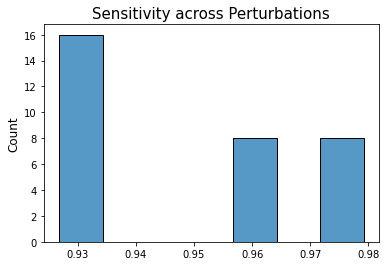

In [34]:
sns.histplot(data = results[:,0], bins = 7)
plt.title('Sensitivity across Perturbations', fontsize = 15)
plt.ylabel('Count', fontsize = 12)
plt.savefig('/users/jbbutler129/Desktop/sensitivity_stab.png', dpi = 300)

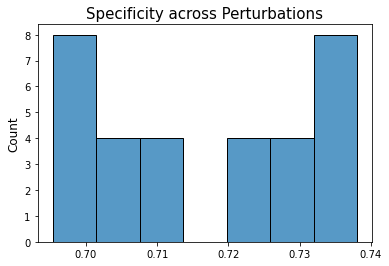

In [33]:
sns.histplot(data = results[:,1], bins = 7)
plt.title('Specificity across Perturbations', fontsize = 15)
plt.ylabel('Count', fontsize = 12)
plt.savefig('/users/jbbutler129/Desktop/specificity_stab.png', dpi = 300)

It seems like of all of the judgement calls, when there is a 92, we always have the vomit judgement call is turned on, meaning we are dropping all observations from the dataset with missing values in any of the columns. The reasoning being that if any of the values are missing, it overall cannot be trusted. However, otherwise we would just impute a missing value, and it's possible that maybe the physician didn't religiously fill out the form, etc.

In [23]:
results_dict

{'(1, 1, 1, 1, 1)': [0.926829268292683, 0.7258687258687259],
 '(1, 1, 1, 1, 0)': [0.9583333333333334, 0.7003484320557491],
 '(1, 1, 1, 0, 1)': [0.926829268292683, 0.7380694980694981],
 '(1, 1, 1, 0, 0)': [0.9583333333333334, 0.709286471746705],
 '(1, 1, 0, 1, 1)': [0.926829268292683, 0.7258687258687259],
 '(1, 1, 0, 1, 0)': [0.9583333333333334, 0.7003484320557491],
 '(1, 1, 0, 0, 1)': [0.926829268292683, 0.7380694980694981],
 '(1, 1, 0, 0, 0)': [0.9583333333333334, 0.709286471746705],
 '(1, 0, 1, 1, 1)': [0.926829268292683, 0.7258687258687259],
 '(1, 0, 1, 1, 0)': [0.9583333333333334, 0.7003484320557491],
 '(1, 0, 1, 0, 1)': [0.926829268292683, 0.7380694980694981],
 '(1, 0, 1, 0, 0)': [0.9583333333333334, 0.709286471746705],
 '(1, 0, 0, 1, 1)': [0.926829268292683, 0.7258687258687259],
 '(1, 0, 0, 1, 0)': [0.9583333333333334, 0.7003484320557491],
 '(1, 0, 0, 0, 1)': [0.926829268292683, 0.7380694980694981],
 '(1, 0, 0, 0, 0)': [0.9583333333333334, 0.709286471746705],
 '(0, 1, 1, 1, 1)': 